# 다중클래스 분류모델의 결정경계 구하기

### 이 문제는 해결하지 못 했습니다.

In [1]:
%matplotlib inline


# Plot multinomial and One-vs-Rest Logistic Regression

Plot decision surface of multinomial and One-vs-Rest Logistic Regression.
The hyperplanes corresponding to the three One-vs-Rest (OVR) classifiers
are represented by the dashed lines.


Automatically created module for IPython interactive environment
training score : 0.995 (multinomial)
training score : 0.976 (ovr)


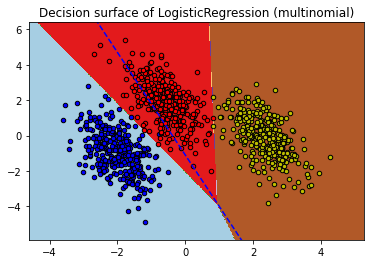

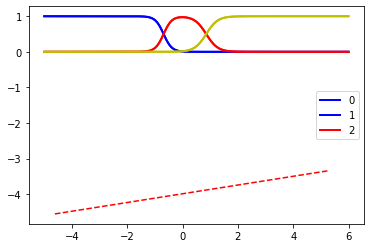

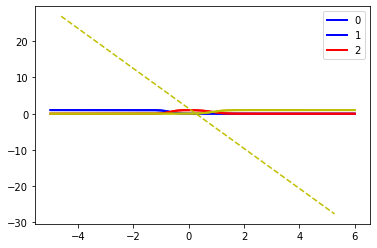

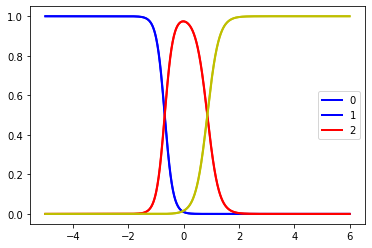

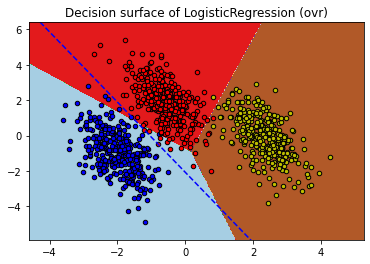

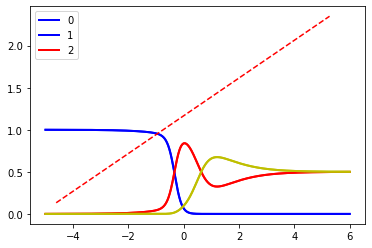

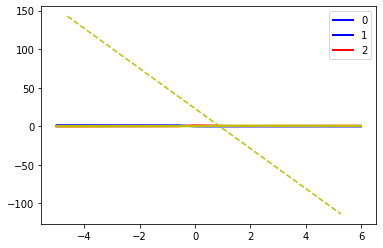

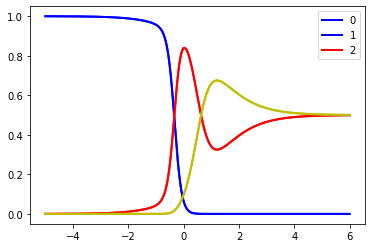

In [58]:
print(__doc__)
# Authors: Tom Dupre la Tour <tom.dupre-la-tour@m4x.org>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

for multi_class in ('multinomial', 'ovr'):
    clf = LogisticRegression(solver='sag', max_iter=100, random_state=42,
                             multi_class=multi_class).fit(X, y)

    # print the training scores
    print("training score : %.3f (%s)" % (clf.score(X, y), multi_class))

    # create a mesh to plot in
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title("Decision surface of LogisticRegression (%s)" % multi_class)
    plt.axis('tight')

    # Plot also the training points
    colors = "bry"
    for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired,
                    edgecolor='black', s=20)

    # Plot the three one-against-all classifiers
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    coef = clf.coef_
    intercept = clf.intercept_

    def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
        plt.plot([xmin, xmax], [line(xmin), line(xmax)],
                 ls="--", color=color)
        X_new = np.linspace(-5, 6, 2000).reshape(1000, 2)
        y_proba = clf.predict_proba(X_new)
        plt.figure()
        plt.plot(X_new, y_proba[:, 0], "b", linewidth=2, label="0")
        plt.plot(X_new, y_proba[:, 1], "r", linewidth=2, label="1")
        plt.plot(X_new, y_proba[:, 2], "y", linewidth=2, label="2")
        plt.legend(["0", "1", "2"])

    for i, color in zip(clf.classes_, colors):
        plot_hyperplane(i, color)

plt.show()

training score : 0.995 (multinomial)


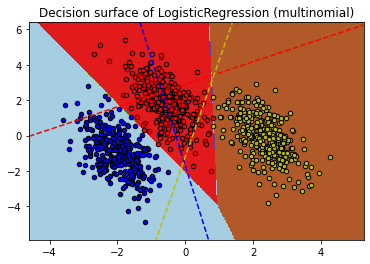

In [53]:
multi_class = 'multinomial'

clf = LogisticRegression(solver='sag', max_iter=100, random_state=42,
                             multi_class=multi_class).fit(X, y)

# print the training scores
print("training score : %.3f (%s)" % (clf.score(X, y), multi_class))

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.title("Decision surface of LogisticRegression (%s)" % multi_class)
plt.axis('tight')

# Plot also the training points
colors = "bry"
for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired,
                edgecolor='black', s=20)

# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = clf.coef_
intercept = clf.intercept_

def sig(z):
    return 1 / (1 + np.exp(-z))

def opsig(z):
    return -np.log((1/z) - 1)

def plot_hyperplane(c, color):
    def line(x0):
        print("c :", c)
        print("coef :", coef[c,0])
        print("intercept :", intercept[c])
        return opsig((-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1])
    plt.plot([xmin, xmax], [line(xmin), line(xmax)],
             ls="--", color=color)
    
# def solution(a):
#     def decbound(x):
#         def softmax(X, W):
#             K = np.size(W, 1)
#             A = np.exp(X @ W)
#             B = np.diag(1 / (np.reshape(A @ np.ones((K,1)), -1)))
#             Y = B @ A
#     return Y



def answer(c, color):
    def line2(x):
        return (intercept[c] + (x * coef[c, 0]) + (x * coef[c, 1]))
    plt.plot([xmin, xmax], [line2(xmin), line2(xmax)],
             ls="--", color=color)

# for i, color in zip(clf.classes_, colors):
#     plot_hyperplane(i, color)

for i, color in zip(clf.classes_, colors):
    answer(i, color)

training score : 0.976 (ovr)
coef : [-4.41615534 -2.23077034]
coef : [-4.41615534 -2.23077034]
coef : [-0.36796618  1.64022091]
coef : [-0.36796618  1.64022091]
coef : [4.7027708  0.18133443]
coef : [4.7027708  0.18133443]


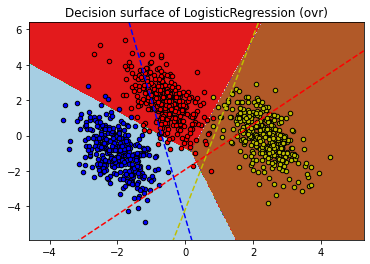

In [52]:
multi_class = 'ovr'

clf = LogisticRegression(solver='sag', max_iter=100, random_state=42,
                             multi_class=multi_class).fit(X, y)

# print the training scores
print("training score : %.3f (%s)" % (clf.score(X, y), multi_class))

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.title("Decision surface of LogisticRegression (%s)" % multi_class)
plt.axis('tight')

# Plot also the training points
colors = "bry"
for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired,
                edgecolor='black', s=20)

# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = clf.coef_
intercept = clf.intercept_

# def plot_hyperplane(c, color):
#     def line(x0):
#         print("c :", c)
#         print("coef :", coef[c,0])
#         print("intercept :", intercept[c])
#         return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
#     plt.plot([xmin, xmax], [line(xmin), line(xmax)],
#              ls="--", color=color)

# for i, color in zip(clf.classes_, colors):
#     plot_hyperplane(i, color)
    
def answer(c, color):
    def line2(x):
        print("coef :", coef[c])
        return (intercept[c] + (x * coef[c, 0]) + x * coef[c, 1])
    plt.plot([xmin, xmax], [line2(xmin), line2(xmax)],
             ls="--", color=color)

for i, color in zip(clf.classes_, colors):
    answer(i, color)
